## FastChat

In [ ]:
# !git clone https://github.com/lm-sys/FastChat.git
# cd FastChat
# !pip install -e ".[model_worker,llm_judge]"

In [ ]:
"""first run on a terminal on your local machine and keep it running in the background: 
>>>kubectl port-forward something-gpu-ultra-inf 8000:8000

Forwarding from 127.0.0.1:8000 -> 8000
Forwarding from [::1]:8000 -> 8000
---------------------------------
then run the following code:
"""
import os
from openai import OpenAI

# Modify OpenAI's API key and API base to use vLLM's API server.
openai_api_key = "EMPTY"
openai_api_base = "http://localhost:8000/v1"

client = OpenAI(
    api_key=openai_api_key,
    base_url=openai_api_base,
)
for i in range(100):
    completion = client.completions.create(model="Meta-Llama-3-70B-Instruct",
                                      prompt="San Francisco is a")
    print("Completion result:", completion)

In [ ]:
!python gen_model_answer.py --model-path <some path>trl/models_rlhf/Llama3-Instruct_armorm_dpo_beta_0.1 --model-id dpo_beta_0.1 --num-gpus-total 8
!python gen_model_answer.py --model-path <some path>trl/models_rlhf/Llama3-Instruct_armorm_dpo_beta_0.01 --model-id dpo_beta_0.01 --num-gpus-total 8
!python gen_model_answer.py --model-path <some path>trl/models_rlhf/Llama3-Instruct_armorm_ipo_beta_0.1 --model-id ipo_beta_0.1 --num-gpus-total 8
!python gen_model_answer.py --model-path <some path>trl/models_rlhf/Llama3-Instruct_armorm_orpo_beta_0.1 --model-id orpo_beta_0.1 --num-gpus-total 8

In [ ]:
python gen_model_answer.py --model-path <some path>/trl/models_rlhf/Llama3-Instruct_armorm_mallows_dpo_beta_0.1 --model-id mallows_dpo_beta_0.1 --num-gpus-total 8

In [ ]:
python gen_model_answer.py --model-path <some path>/trl/models_rlhf/beta/Llama3-Instruct_armorm_dpo_beta_0.1 --model-id dpo_beta_0.1 --num-gpus-total 8

lr=0.5

In [ ]:
python gen_model_answer.py --model-path <some path>/trl/models_rlhf/Llama3-Instruct_armorm_mallows_dpo_beta_0.05_lr_0.5 --model-id mallows_dpo_beta_0.05_lr_0.5 --num-gpus-total 8

In [ ]:
python gen_model_answer.py --model-path <some path>/trl/models_rlhf/learning_rate/Llama3-Instruct_armorm_dpo_beta_0.05_lr_0.5 --model-id dpo_beta_0.05_lr_0.5 --num-gpus-total 8

xpos

In [ ]:
python gen_model_answer.py --model-path <some path>/trl/models_rlhf/learning_rate/Llama3-Instruct_armorm_dpo_beta_0.05_lr_0.5 --model-id dpo_beta_0.05_lr_0.5 --num-gpus-total 8

In [ ]:
!export openai_api_key="http://localhost:8000/v1"
!python gen_judgment_local.py --model-list dpo_beta_0.1 dpo_beta_0.01 --judge-model "Meta-Llama-3-70B-Instruct"
!python gen_judgment_local.py --model-list ipo_beta_0.1 orpo_beta_0.1 --judge-model "Meta-Llama-3-70B-Instruct"

In [ ]:
!python show_result.py --model-list dpo_beta_0.1 dpo_beta_0.01 ipo_beta_0.1 orpo_beta_0.1 --judge-model "judger_Meta-Llama-3-70B-Instruct"

xpos+mallows

In [ ]:
python gen_model_answer.py --model-path <some path>/trl/models_rlhf/learning_rate/Llama3-Instruct_armorm_dpo_beta_0.05_lr_0.5 --model-id dpo_beta_0.05_lr_0.5 --num-gpus-total 8

## Alpaca

In [ ]:
"""first run on a terminal on your local machine and keep it running in the background: 
>>>kubectl port-forward something-gpu-ultra-inf 8000:8000

Forwarding from 127.0.0.1:8000 -> 8000
Forwarding from [::1]:8000 -> 8000
---------------------------------
then run the following code:
"""
import os
from openai import OpenAI

# Modify OpenAI's API key and API base to use vLLM's API server.
openai_api_key = "EMPTY"
openai_api_base = "http://localhost:8000/v1"

client = OpenAI(
    api_key=openai_api_key,
    base_url=openai_api_base,
)
for i in range(100):
    completion = client.completions.create(model="Meta-Llama-3-70B-Instruct",
                                      prompt="San Francisco is a")
    print("Completion result:", completion)

In [3]:
import datasets

eval_set = datasets.load_from_disk("<some path>/raw_datasets/alpaca_eval")

In [4]:
eval_set

Dataset({
    features: ['instruction', 'output', 'generator', 'dataset'],
    num_rows: 805
})

In [ ]:
CUDA_VISIBLE_DEVICES=0 alpaca_eval generate_from_model --model_configs "Llama-3-Instruct-8B-RainbowPO"

In [ ]:
CUDA_VISIBLE_DEVICES=0 alpaca_eval generate_from_model --model_configs "Llama-3-Instruct-8B-RainbowPO-LoRA"

In [ ]:
CUDA_VISIBLE_DEVICES=1 alpaca_eval generate_from_model --model_configs "Llama-3-Instruct-8B-RainbowPO"

In [ ]:
CUDA_VISIBLE_DEVICES=2 alpaca_eval generate_from_model --model_configs "Llama-3-Instruct-8B-RainbowPO"

In [ ]:
CUDA_VISIBLE_DEVICES=3 alpaca_eval generate_from_model --model_configs "Llama-3-Instruct-8B-RainbowPO"

In [ ]:
CUDA_VISIBLE_DEVICES=4 alpaca_eval generate_from_model --model_configs "Llama-3-Instruct-8B-RainbowPO"

## Change $\beta$

In [ ]:
export OPENAI_API_KEY="EMPTY" # for more complex configs, e.g. using Azure or switching clients see client_configs/README.md 
alpaca_eval evaluate --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-DPO-beta=0.1/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt-4o-2024-05-13/model_outputs.json' --annotators_config='alpaca_eval_llama3_70b_fn_local'

In [ ]:
# compared to gpt4
alpaca_eval evaluate --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-DPO-beta=0.05/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt4_1106_preview/model_outputs.json' --annotators_config='alpaca_eval_llama3_70b_fn_local'

In [ ]:
# compare to gpt4o
alpaca_eval evaluate --model_outputs '<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-DPO-beta=0.05-temp=1.0/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt-4o-2024-05-13/model_outputs.json' --annotators_config 'alpaca_eval_llama3_70b_fn_local'

In [ ]:
# compare to gpt4o
alpaca_eval evaluate --model_outputs '<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-Mallows-DPO-beta=0.05-temp=1.0/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt-4o-2024-05-13/model_outputs.json' --annotators_config 'alpaca_eval_llama3_70b_fn_local'

## Change LR to 0.5 and 0.3

In [ ]:
!alpaca_eval evaluate --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt4_1106_preview/model_outputs.json' --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-DPO-beta=0.1-lr=0.5/model_outputs.json'  --annotators_config='alpaca_eval_llama3_70b_fn_local'

In [ ]:
!alpaca_eval evaluate --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt4_1106_preview/model_outputs.json' --model_outputs '<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-DPO-beta=0.05-lr=0.3/model_outputs.json' --annotators_config 'alpaca_eval_llama3_70b_fn_local'

In [ ]:
!alpaca_eval evaluate --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt4_1106_preview/model_outputs.json' --model_outputs '<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-DPO-beta=0.01-lr=0.5/model_outputs.json' --annotators_config 'alpaca_eval_llama3_70b_fn_local'

In [ ]:
## learning rate 0.3
!alpaca_eval evaluate --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt-4o-2024-05-13/model_outputs.json' --model_outputs '<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-DPO-beta=0.1-lr=0.3/model_outputs.json' --annotators_config 'alpaca_eval_llama3_70b_fn_local'

## XPOs

In [ ]:
# IPO
alpaca_eval evaluate --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt4_1106_preview/model_outputs.json' --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-IPO-beta=0.001-lr=0.5/model_outputs.json'  --annotators_config='alpaca_eval_llama3_70b_fn_local'

In [ ]:
alpaca_eval evaluate --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt4_1106_preview/model_outputs.json' --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-IPO-beta=10-LN-hadv=0.5-max=2048/model_outputs.json'  --annotators_config='alpaca_eval_llama3_70b_fn_local'

In [ ]:
# ORPO
alpaca_eval evaluate --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt4_1106_preview/model_outputs.json' --model_outputs '<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-ORPO-beta=0.1/model_outputs.json' --annotators_config 'alpaca_eval_llama3_70b_fn_local'

In [ ]:
# SimPO
alpaca_eval evaluate --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt4_1106_preview/model_outputs.json' --model_outputs '<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-SimPO-beta=10-max=2048/model_outputs.json' --annotators_config 'alpaca_eval_llama3_70b_fn_local'

## Length Normalization

In [ ]:
alpaca_eval evaluate --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-DPO-beta=10-LN-max=2048/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt4_1106_preview/model_outputs.json' --annotators_config='alpaca_eval_llama3_70b_fn_local'

# Home Advantage

In [ ]:
alpaca_eval evaluate --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-DPO-beta=0.05-hadv=-0.001/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt-4o-2024-05-13/model_outputs.json' --annotators_config='alpaca_eval_llama3_70b_fn_local'

In [ ]:
alpaca_eval evaluate --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-DPO-beta=0.05-hadv=0.01/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt-4o-2024-05-13/model_outputs.json' --annotators_config='alpaca_eval_llama3_70b_fn_local'

In [ ]:
alpaca_eval evaluate --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-DPO-beta=0.05-hadv=0.01/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt-4o-2024-05-13/model_outputs.json' --annotators_config='alpaca_eval_llama3_70b_fn_local'

# Home advantage + length normalization

In [ ]:
alpaca_eval evaluate --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-DPO-beta=10-LN-hadv=-0.05/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt-4o-2024-05-13/model_outputs.json' --annotators_config='alpaca_eval_llama3_70b_fn_local'

# LORA

In [3]:
# load LORA model weights and save the whole model
import torch
from peft import PeftModelForCausalLM
from transformers import LlamaForCausalLM,AutoTokenizer
base_model_name_or_path="<some path>/model_zoo/Meta-Llama-3-8B-Instruct"

lora_model_list = ["mallows_dpo_beta_0.1",
    ]

for lora_model_name in lora_model_list:
    print(f"Transforming model {lora_model_name}\n")
    lora_model_name = "Llama3-Instruct_armorm_LoRA_r_32_a_64_" + lora_model_name

    model = LlamaForCausalLM.from_pretrained(base_model_name_or_path, device_map="auto")
    tokenizer = AutoTokenizer.from_pretrained(base_model_name_or_path)

    peft_config_path = "<some path>/trl/models_rlhf_lora/"+lora_model_name
    model = PeftModelForCausalLM.from_pretrained(model,peft_config_path)
    merged_model = model.merge_and_unload()
    merged_model.save_pretrained(save_directory="<some path>/trl/models_rlhf/"+lora_model_name, max_shard_size="10GB")
    tokenizer.save_pretrained(save_directory="<some path>/trl/models_rlhf/"+lora_model_name)

Transforming model mallows_dpo_beta_0.1



Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[2024-08-08 16:58:55,843] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)
 [WARNING]  async_io requires the dev libaio .so object and headers but these were not found.
 [WARNING]  async_io: please install the libaio-dev package with apt
 [WARNING]  If libaio is already installed (perhaps from source), try setting the CFLAGS and LDFLAGS environment variables to where it can be found.
 [WARNING]  Please specify the CUTLASS repo directory as environment variable $CUTLASS_PATH


/opt/conda/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


 [WARNING]  sparse_attn requires a torch version >= 1.5 and < 2.0 but detected 2.1
 [WARNING]  using untested triton version (2.1.0), only 1.0.0 is known to be compatible


: 

In [1]:
import torch
from peft import PeftModelForCausalLM
from transformers import LlamaForCausalLM,AutoTokenizer
base_model_name_or_path="<some path>/model_zoo/Meta-Llama-3-8B-Instruct"

lora_model_list = ["rainbowpo_beta_0.01",
    ]

for lora_model_name in lora_model_list:
    print(f"Transforming model {lora_model_name}\n")
    lora_model_name = "Llama3-Instruct_armorm_LoRA_r_128_a_256_" + lora_model_name

    model = LlamaForCausalLM.from_pretrained(base_model_name_or_path, device_map="auto")
    tokenizer = AutoTokenizer.from_pretrained(base_model_name_or_path)

    peft_config_path = "<some path>/trl/models_rlhf_lora/"+lora_model_name
    model = PeftModelForCausalLM.from_pretrained(model,peft_config_path)
    merged_model = model.merge_and_unload()
    merged_model.save_pretrained(save_directory="<some path>/trl/models_rlhf/"+lora_model_name, max_shard_size="10GB")
    tokenizer.save_pretrained(save_directory="<some path>/trl/models_rlhf/"+lora_model_name)

Transforming model rainbowpo_beta_0.01



Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[2024-08-11 03:05:28,438] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)
 [WARNING]  async_io requires the dev libaio .so object and headers but these were not found.
 [WARNING]  async_io: please install the libaio-dev package with apt
 [WARNING]  If libaio is already installed (perhaps from source), try setting the CFLAGS and LDFLAGS environment variables to where it can be found.
 [WARNING]  Please specify the CUTLASS repo directory as environment variable $CUTLASS_PATH


/opt/conda/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


 [WARNING]  sparse_attn requires a torch version >= 1.5 and < 2.0 but detected 2.1
 [WARNING]  using untested triton version (2.1.0), only 1.0.0 is known to be compatible


In [ ]:
CUDA_VISIBLE_DEVICES=0 alpaca_eval generate_from_model --model_configs "Llama-3-Instruct-8B-RainbowPO"

In [ ]:
# compared to gpt4
alpaca_eval evaluate --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-LORA-r32-DPO-beta=10-LN-hadv=-0.05/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt4_1106_preview/model_outputs.json' --annotators_config='alpaca_eval_llama3_70b_fn_local'

In [ ]:
# compared to gpt4 (temp 0.7)
alpaca_eval evaluate --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-LORA-r128-DPO-beta=0.05-lr=0.3-temp=0.7/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt4_1106_preview/model_outputs.json' --annotators_config='alpaca_eval_llama3_70b_fn_local'

In [ ]:
# compared to gpt4
alpaca_eval evaluate --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-LORA-r128-DPO-beta=0.05/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt4_1106_preview/model_outputs.json' --annotators_config='alpaca_eval_llama3_70b_fn_local'

In [ ]:
# compared to gpt4
alpaca_eval evaluate --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-LORA-r128-DPO-beta=0.01-lr=0.5-temp=0.7/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt4_1106_preview/model_outputs.json' --annotators_config='alpaca_eval_llama3_70b_fn_local'

## Mallows

In [ ]:
# compared to gpt4o
alpaca_eval evaluate --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-Mallows-DPO-beta=0.1-/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt-4o-2024-05-13/model_outputs.json' --annotators_config='alpaca_eval_llama3_70b_fn_local'

In [ ]:
# compared to gpt4
alpaca_eval evaluate --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-Mallows-DPO-beta=0.05-temp=0.7/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt4_1106_preview/model_outputs.json' --annotators_config='alpaca_eval_llama3_70b_fn_local'

In [ ]:
alpaca_eval evaluate --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-Mallows-IPO-beta=0.1/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt-4o-2024-05-13/model_outputs.json' --annotators_config='alpaca_eval_llama3_70b_fn_local'

In [ ]:
# compared to gpt4
alpaca_eval evaluate --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-LORA-r32-Mallows-DPO-beta=0.1-temp=0.7/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt4_1106_preview/model_outputs.json' --annotators_config='alpaca_eval_llama3_70b_fn_local'

In [ ]:
alpaca_eval evaluate --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-LoRA-RainbowPO-beta=0.01/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt4_1106_preview/model_outputs.json' --annotators_config='alpaca_eval_llama3_70b_fn_local'

### Direct comparison

alpaca_eval evaluate --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-Mallows-DPO-beta=0.05/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-DPO-beta=0.05/model_outputs.json' --annotators_config='alpaca_eval_llama3_70b_fn_local'

In [ ]:
alpaca_eval evaluate --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-Mallows-SimPO-beta=10/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-SimPO-beta=10-hadv=0.3/model_outputs.json' --annotators_config='alpaca_eval_llama3_70b_fn_local'

In [2]:
"lora" in "LORA_model".lower()

True

In [6]:
import torch
import math
torch.atan(torch.tensor(1.0)) * 2 * 2 /torch.tensor([math.pi])

tensor([1.])

In [10]:
a =torch.tensor(0.0)
a.atan().log()

tensor(-inf)

In [11]:
((x).atan()/math.pi + 0.5).log()

tensor(-0.6931)

In [12]:
import matplotlib.pyplot as plt

In [18]:
def f(x):
    return ((x).atan()/math.pi + 0.5).log()

a = torch.tensor(range(-10,10,1))
f(a)

tensor([-3.4506, -3.3460, -3.2293, -3.0974, -2.9456, -2.7673, -2.5513, -2.2787,
        -1.9134, -1.3863, -0.6931, -0.2877, -0.1597, -0.1080, -0.0812, -0.0649,
        -0.0540, -0.0462, -0.0404, -0.0359])

In [32]:


a = torch.tensor(range(-40,40,1))
f(a)

tensor([-4.8338, -4.8085, -4.7825, -4.7559, -4.7285, -4.7003, -4.6714, -4.6415,
        -4.6108, -4.5791, -4.5463, -4.5124, -4.4774, -4.4410, -4.4033, -4.3641,
        -4.3234, -4.2809, -4.2365, -4.1900, -4.1413, -4.0901, -4.0361, -3.9791,
        -3.9186, -3.8543, -3.7855, -3.7116, -3.6319, -3.5454, -3.4506, -3.3460,
        -3.2293, -3.0974, -2.9456, -2.7673, -2.5513, -2.2787, -1.9134, -1.3863,
        -0.6931, -0.2877, -0.1597, -0.1080, -0.0812, -0.0649, -0.0540, -0.0462,
        -0.0404, -0.0359, -0.0322, -0.0293, -0.0268, -0.0247, -0.0230, -0.0214,
        -0.0201, -0.0189, -0.0178, -0.0169, -0.0160, -0.0153, -0.0146, -0.0139,
        -0.0133, -0.0128, -0.0123, -0.0119, -0.0114, -0.0110, -0.0107, -0.0103,
        -0.0100, -0.0097, -0.0094, -0.0091, -0.0089, -0.0086, -0.0084, -0.0082])

(0.0, 6.0)

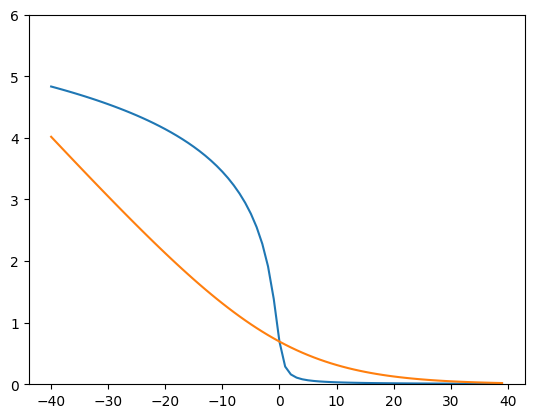

In [33]:
plt.plot(a, -f(a))
plt.plot(a, -(0.1*a).sigmoid().log())
plt.ylim(0,6)

In [ ]:
python RM_evaluate.py --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-DPO-beta=0.1/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt4_1106_preview/model_outputs.json'

In [ ]:
alpaca_eval evaluate --model_outputs='<some path>/evaluations/alpaca_eval/results/Llama-3-Instruct-8B-SimPO-beta=10-LN-hadv=0.3-max=2048-wr=0.1/model_outputs.json' --reference_outputs='<some path>/evaluations/alpaca_eval/results/gpt4_1106_preview/model_outputs.json' --annotators_config='alpaca_eval_llama3_70b_fn_local'